In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("traintitanic.csv")

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
train.size

10692

In [6]:
train.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
train['SibSp'].value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [10]:
train = train.drop(['Name'],axis=1)

In [11]:
train = train.drop(['Ticket'],axis=1)

In [60]:
train = train.drop(['Cabin'],axis=1)

In [12]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,1,0,3,male,22.0,1,0,7.2500,NaN,S
1,2,1,1,female,38.0,1,0,71.2833,C85,C
2,3,1,3,female,26.0,0,0,7.9250,NaN,S
3,4,1,1,female,35.0,1,0,53.1000,C123,S
4,5,0,3,male,35.0,0,0,8.0500,NaN,S


In [13]:
train = train.drop(['PassengerId','Embarked'],axis=1)

In [14]:
train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,0,3,male,22.0,1,0,7.2500,NaN
1,1,1,female,38.0,1,0,71.2833,C85
2,1,3,female,26.0,0,0,7.9250,NaN
3,1,1,female,35.0,1,0,53.1000,C123
4,0,3,male,35.0,0,0,8.0500,NaN


In [15]:
train['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

In [65]:
342/(549+342)

0.3838383838383838

In [16]:
train.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin'], dtype='object')

In [68]:
train1 = train.dropna(axis=0)

In [17]:
train = train.fillna(-99)

In [18]:
Y = train['Survived']

In [19]:
train = train.drop(['Survived'],axis=1)

In [20]:
from sklearn import preprocessing

In [21]:
for f in train.columns:
    if train[f].dtype=='object':
        #print(f)
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values))
        train[f] = lbl.transform(list(train[f].values))

In [22]:
train.dtypes

Pclass      int64
Sex         int64
Age       float64
SibSp       int64
Parch       int64
Fare      float64
Cabin       int64
dtype: object

In [23]:
from sklearn.linear_model import LogisticRegression

In [24]:
logreg = LogisticRegression()
logreg.fit(train,Y)

C:\Anacondanew\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [31]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit( n_splits=10, test_size=0.3, random_state=304)
print(sss.get_n_splits(train,Y))
for train_index, test_index in sss.split(train,Y):
    X_train, X_test = train.values[train_index], train.values[test_index]
    y_train, y_test = Y[train_index], Y[test_index]

10


KNeighborsClassifier
****Results****
Accuracy: 75.0000%
Log Loss: 3.7676850487842626
SVC
****Results****
Accuracy: 80.5970%
Log Loss: 0.5310214714643869


C:\Anacondanew\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


NuSVC
****Results****
Accuracy: 74.6269%
Log Loss: 0.5590229292738274
DecisionTreeClassifier
****Results****
Accuracy: 79.8507%
Log Loss: 6.840969603185243
RandomForestClassifier
****Results****
Accuracy: 82.4627%
Log Loss: 0.6874509071073349
GaussianNB
****Results****
Accuracy: 80.2239%
Log Loss: 0.7680936668450955
AdaBoostClassifier
****Results****
Accuracy: 77.9851%
Log Loss: 0.6660112133660503
XGBClassifier
****Results****
Accuracy: 83.9552%
Log Loss: 0.471096474955331


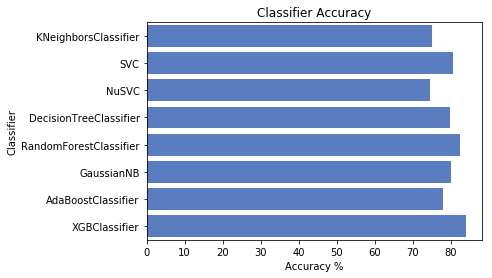

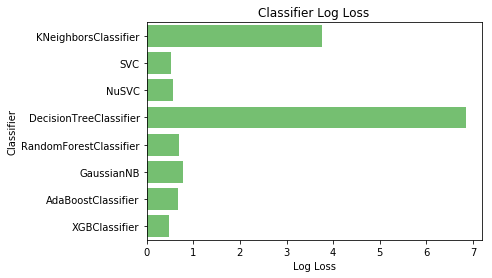

In [34]:
from sklearn.metrics import accuracy_score, log_loss
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
classifiers = [
    KNeighborsClassifier(3),
    SVC(C=27,gamma=0.005,probability=True),
    NuSVC(probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=100),
    GaussianNB(),
    AdaBoostClassifier(),
    xgb.XGBClassifier(n_estimators=1000,
                        n_jobs=-1,
                        max_depth=50,
                        booster='dart',
                        learning_rate=0.001,
                        silent=False,
                        subsample=1,
                        colsample_bytree=1)]
# Logging for Visual Comparison
log_cols=["Classifier", "Accuracy", "Log Loss"]
log = pd.DataFrame(columns=log_cols)

for clf in classifiers:
    clf.fit(X_train, y_train)
    name = clf.__class__.__name__
    
    print("="*30)
    print(name)
    
    print('****Results****')
    train_predictions = clf.predict(X_test)
    acc = accuracy_score(y_test, train_predictions)
    print("Accuracy: {:.4%}".format(acc))
    
    train_predictions = clf.predict_proba(X_test)
    ll = log_loss(y_test, train_predictions)
    print("Log Loss: {}".format(ll))
    
    log_entry = pd.DataFrame([[name, acc*100, ll]], columns=log_cols)
    log = log.append(log_entry)
    
print("="*30)

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log, color="b")

plt.xlabel('Accuracy %')
plt.title('Classifier Accuracy')
plt.show()

sns.set_color_codes("muted")
sns.barplot(x='Log Loss', y='Classifier', data=log, color="g")

plt.xlabel('Log Loss')
plt.title('Classifier Log Loss')
plt.show()